# Urban Simulation Assessment

### Student ID: 20103637

# Part 1: London’s underground resilience


In [1]:
#load libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from statistics import mean
import numpy as np

In [2]:
# constructing network 
G= nx.read_graphml('london.graph.xml')
G.name='London Tube Network'

In [3]:
#check the number of nodes and edges
nx.info(G)

"Graph named 'London Tube Network' with 401 nodes and 467 edges"

In [4]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [48]:
list(G.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweenness_t': 0.1350979134343796,
  'closeness_t': 0.09465215333648841,
  'betweenness_w': 0.08847431077694236})

In [5]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [6]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

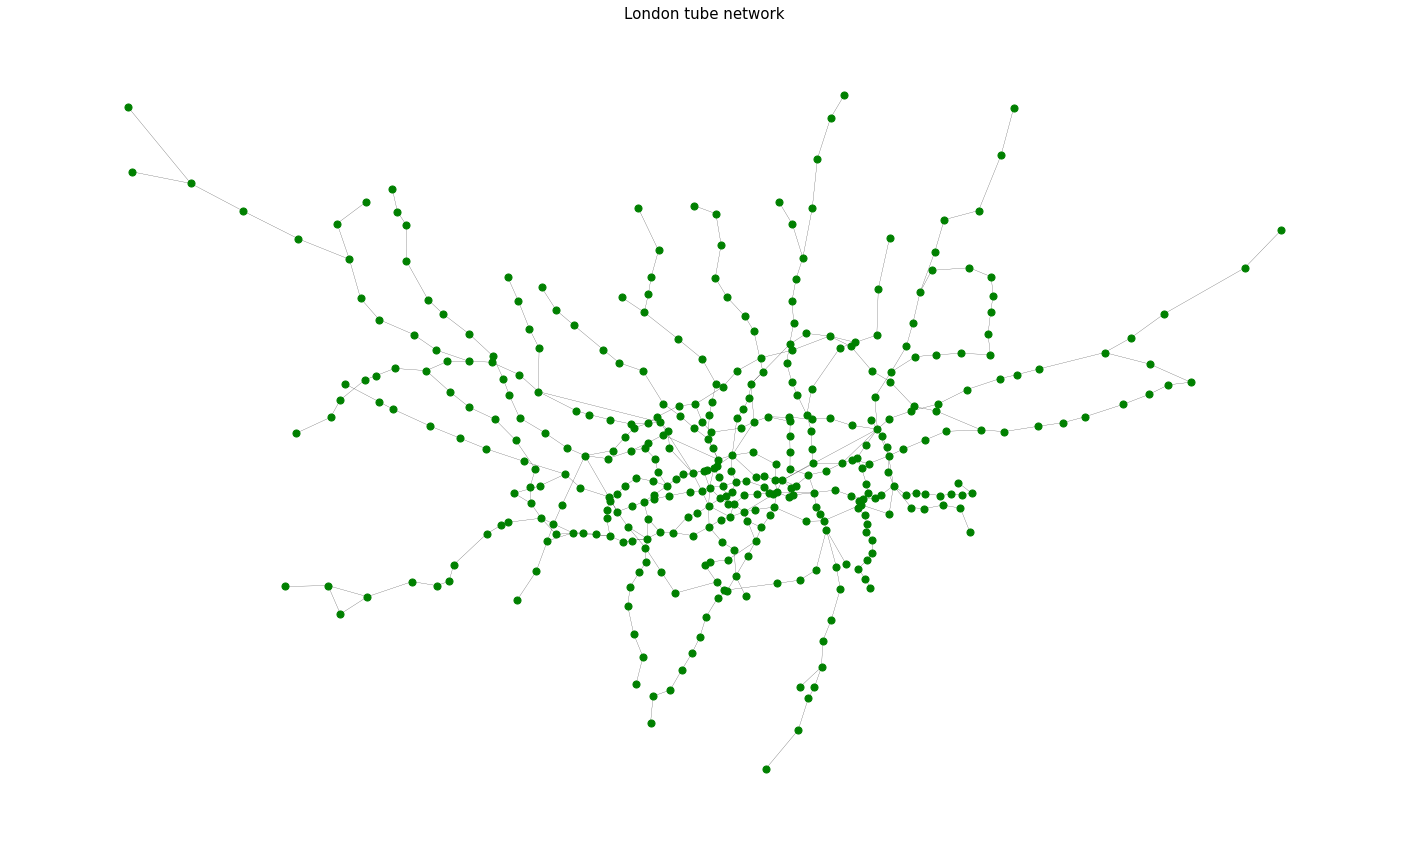

In [7]:
#plot the network
fig,ax=plt.subplots(figsize=(25,15))
# node_labels=nx.get_node_attributes(G,G.nodes() )
pos=nx.get_node_attributes(G,'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='g')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# nx.draw_networksx_labels(G,pos,node_labels,font_size=10,font_color=black)


plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [8]:
 #We can print the dataframe to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,flows,length
0,Wembley Park,Kingsbury,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Metropolitan,36601,1419.735166
3,Wembley Park,Finchley Road,Metropolitan,55216,7266.373927
4,Kingsbury,Queensbury,Jubilee,9419,1245.995234
5,Queensbury,Canons Park,Jubilee,6385,1693.307343
6,Canons Park,Stanmore,Jubilee,3624,1419.669476
7,Stratford,West Ham,Jubilee,91801,1673.509515
8,Stratford,Mile End,Central,12010,2805.001392
9,Stratford,Leyton,Central,56082,2131.342926


In [9]:
# the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})

In [10]:
# diameter of the network
nx.diameter(G)

36

In [11]:
# number of connected components
nx.number_connected_components(G)

1

## I. Topological network
### I.1. Centrality measures:

#### Degree Centrality on nodes:

In [12]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [13]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [14]:
# Degree Centrality
values_sorted1 = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
deg_sorted_ten=[e for e,v in values_sorted1[:10]]
deg_sorted_ten

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [15]:
#reset index for the final integrated table
sum1=df_sorted.reset_index().rename(columns={'index':'degree_stations'}).head(10)

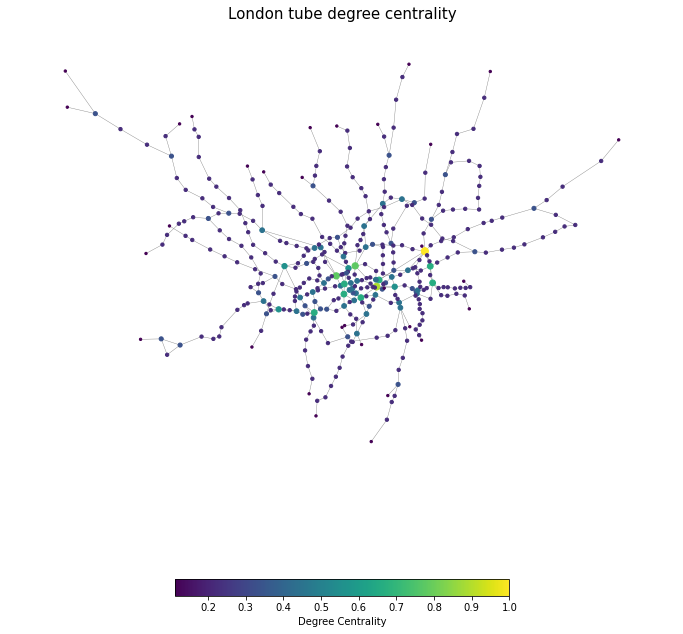

In [16]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:¶

In [17]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [18]:
#reset index for the final integrated table
sum2=df_sorted.reset_index().rename(columns={'index':'betweenness_t_stations'}).head(10)

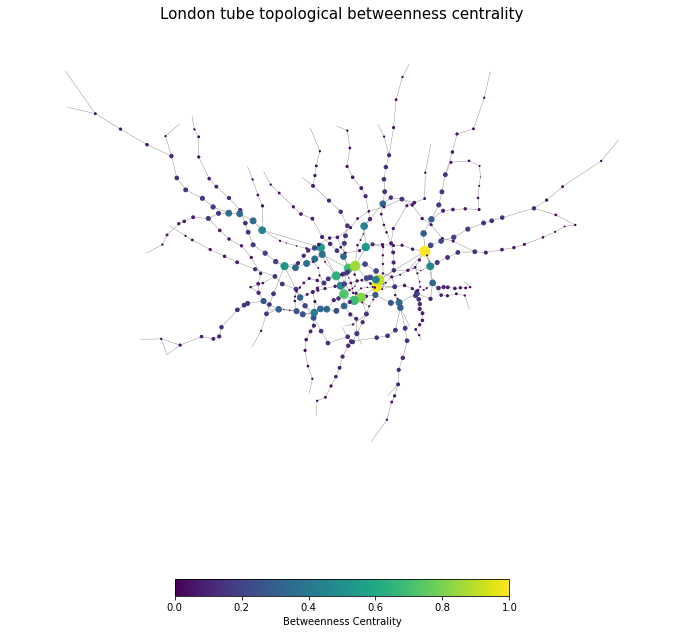

In [19]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [20]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


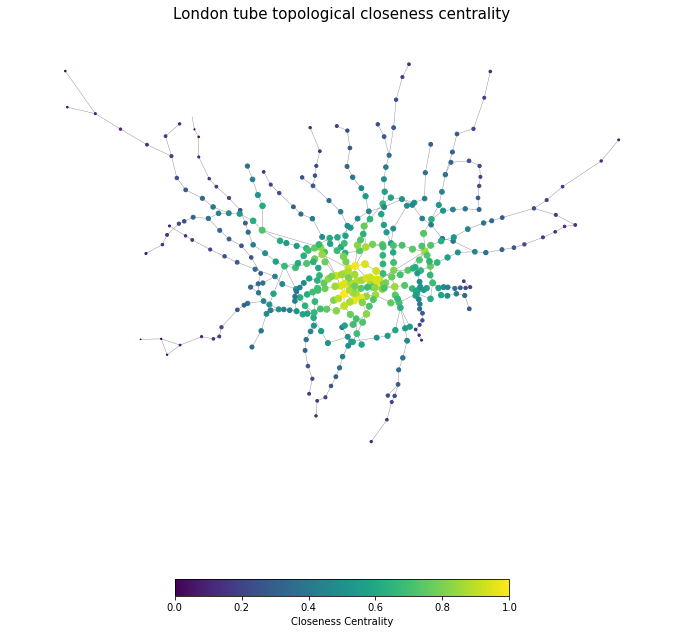

In [21]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [22]:
#reset index for the final integrated table
sum3=df_sorted.reset_index().rename(columns={'index':'closeness_t_stations'}).head(10)

In [46]:
#combine the results of three centrality measures 
sum = pd.concat([sum1, sum2,sum3], axis=1)
sum

,degree_stations,degree,betweenness_t_stations,betweenness_t,closeness_t_stations,closeness_t
0,Stratford,0.0225,Stratford,0.297846,Green Park,0.114778
1,Bank and Monument,0.0200,Bank and Monument,0.290489,Bank and Monument,0.113572
2,King's Cross St. Pancras,0.0175,Liverpool Street,0.270807,King's Cross St. Pancras,0.113443
3,Baker Street,0.0175,King's Cross St. Pancras,0.255307,Westminster,0.112549
4,Earl's Court,0.0150,Waterloo,0.243921,Waterloo,0.112265
5,Oxford Circus,0.0150,Green Park,0.215835,Oxford Circus,0.111204
6,Liverpool Street,0.0150,Euston,0.208324,Bond Street,0.110988
7,Waterloo,0.0150,Westminster,0.203335,Farringdon,0.110742
8,Green Park,0.0150,Baker Street,0.191568,Angel,0.110742
9,Canning Town,0.0150,Finchley Road,0.165085,Moorgate,0.110314


### I.2. Impact measures: 

* giant component
* global efficiency

### I.3. Node removal:

In [24]:
#find the top 10 nodes, we atually the top 11 stations here for code non-sequential node removal needed,but in code implementation, only the top ten's global efficiency and giant componennt will be calculated
# Degree Centrality
values_sorted1 = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
deg_sorted_ten=[e for e,v in values_sorted1[:11]]

# Betweenness Centrality
values_sorted2 = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
bet_sorted_ten=[e for e,v in values_sorted2[:11]]

# Degree Centrality
values_sorted3= sorted(clos_t.items(), key=itemgetter(1), reverse=True)
close_sorted_ten=[e for e,v in values_sorted3[:11]]

#### a.non-sequential node removal


In [25]:
# For loop to iteratelly remove the ranked stations and calculate the global efficiency and giant component after each removal 
G2=G.copy()

#betweenness 
bet_global_efficiency =[]
bet_largest_component=[]

for i in bet_sorted_ten:
    
    # global efficiency
    global_efficiency=nx.global_efficiency(G2)
    bet_global_efficiency.append(global_efficiency)
    
    #size of giant component 
    largest_cc =len( max(nx.connected_components(G2), key=len))
    bet_largest_component.append(largest_cc )
    
    #remove the highest ranked node 
    G2.remove_node(i)


In [26]:
#degree 
G3=G.copy()
deg_global_efficiency =[]
deg_largest_component=[]

for i in deg_sorted_ten:
    
    # global efficiency
    global_efficiency=nx.global_efficiency(G3)
    deg_global_efficiency.append(global_efficiency)
    
    #size of giant component 
    largest_cc =len( max(nx.connected_components(G3), key=len))
    deg_largest_component.append(largest_cc )
    
    #remove the highest ranked node 
    G3.remove_node(i)

In [27]:
#closeness
G4=G.copy()
close_global_efficiency =[]
close_largest_component=[]

for i in close_sorted_ten:
    
    # global efficiency
    global_efficiency=nx.global_efficiency(G4)
    close_global_efficiency.append(global_efficiency)
    
    #largest connected components
    largest_cc =len( max(nx.connected_components(G4), key=len))
    close_largest_component.append(largest_cc )
    
    #remove the highest ranked node 
    G4.remove_node(i)

#### b. sequential node removal

In [28]:
#degree 
G3=G.copy()
deg_global_efficiency2 =[]
deg_largest_component2=[]

i = 1
while i <= 11: # 11 because we want to know the giant comonent and global efficiency before removing any node
     #1.global effeciency
    global_efficiency=nx.global_efficiency(G3)
    deg_global_efficiency2.append(global_efficiency)
    
    #2.size of giant component
    largest_cc =len( max(nx.connected_components(G3), key=len))
    deg_largest_component2.append(largest_cc )
    
    #3.remove the largest node 
    degree_values=[(i[1]['degree']) for i in G3.nodes(data=True)]
    #find the largest centrality station
    maxdeg=[n for n in G3.nodes() if G3.nodes[n]['degree'] == max(degree_values)]
#     print(maxdeg[0]) #check the station being removed
    #delete the largest one
    G3.remove_node(maxdeg[0]) #if there are equal values, then only select one to remove

    #4.recompute the betweenness centrality 
    deg_london =nx.degree_centrality(G3)
    nx.set_node_attributes(G3,dict(deg_london),'degree')
    
    
    #5.for loop
    i += 1

In [29]:
#betweenness
G2=G.copy()

bet_global_efficiency2 =[]
bet_largest_component2=[]

i = 1
while i <= 11:
     #1.global effeciency
    global_efficiency=nx.global_efficiency(G2)
    bet_global_efficiency2.append(global_efficiency)
    
    #2.largest connected components
    largest_cc =len( max(nx.connected_components(G2), key=len))
    bet_largest_component2.append(largest_cc )
    
    #3.remove the largest node 
    # Lets set colour and size of nodes according to betweenness values
    betweenness_t_values=[(i[1]['betweenness_t']) for i in G2.nodes(data=True)]
    #find the largest centrality station
    maxbet=[n for n in G2.nodes() if G2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
#     print(maxbet[0])
    #delete the largest one
    G2.remove_node(maxbet[0])
  
    #4.recompute the betweenness centrality 
    bet_london_t=nx.betweenness_centrality(G2, normalized=True)
    #add these values to the nodes attributes:
    nx.set_node_attributes(G2,bet_london_t,'betweenness_t')
        
    #5.for loop
    i += 1


In [30]:
#closeness
G4=G.copy()
close_global_efficiency2 =[]
close_largest_component2=[]

i = 1
while i <= 11:
    # 1.global efficiency
    global_efficiency=nx.global_efficiency(G4)
    close_global_efficiency2.append(global_efficiency)
    
    #2.largest connected components
    largest_cc =len( max(nx.connected_components(G4), key=len))
    close_largest_component2.append(largest_cc )
    
    #3.remove the largest node 
    clos_t_val=[(i[1]['closeness_t']) for i in G4.nodes(data=True)]
    #find the largest centrality station
    maxclo=[n for n in G4.nodes() if G4.nodes[n]['closeness_t'] == max(clos_t_val)]
#     print(maxclo)
    #delete the largest one
    G4.remove_node(maxclo[0])
    
    #4.recompute the topological closeness centrality
    clos_t=nx.closeness_centrality(G4)
    # We can add these values to the nodes attributes:
    nx.set_node_attributes(G4,clos_t,'closeness_t')
   
    # 5. for loop 
    i += 1

#### Plotting the results

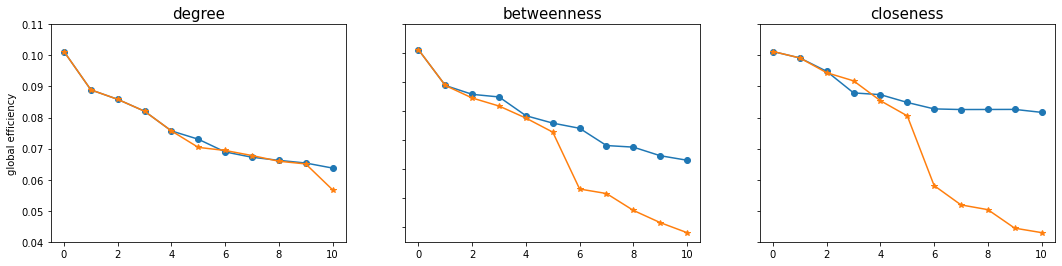

In [31]:

# global efficiency
f, axs = plt.subplots(1,3,figsize=(18,4))
# plt.set_ylim([0, 0.11])

#degree
plt.subplot(1,3,1)
plt.title('degree',fontsize=15)
plt.plot(deg_global_efficiency,marker='o')
plt.plot(deg_global_efficiency2,marker='*')
plt.yticks(np.arange(0.04, 0.11, 0.01))


#betweenness

plt.subplot(1,3,2)
plt.title('betweenness',fontsize=15)
plt.plot(bet_global_efficiency,marker='o')
plt.plot(bet_global_efficiency2,marker='*')
plt.yticks(np.arange(0.04, 0.11, 0.01))

#closeness
plt.subplot(1,3,3)
plt.title('closeness',fontsize=15)
plt.plot(close_global_efficiency,marker='o')
plt.plot(close_global_efficiency2,marker='*')
plt.yticks(np.arange(0.04, 0.11, 0.01))

for ax in axs.flat:
    ax.set(ylabel='global efficiency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

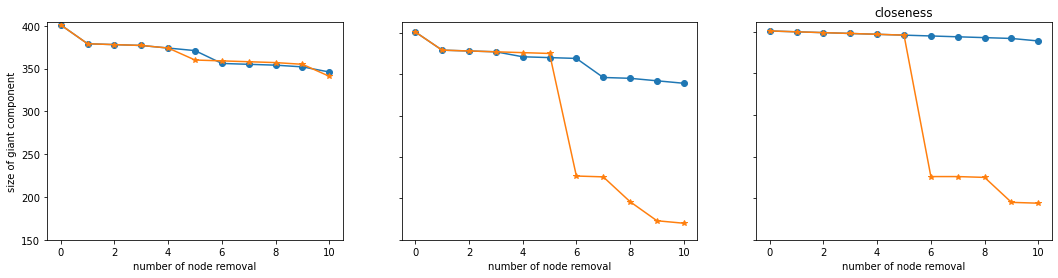

In [32]:
#largest component

f, axs = plt.subplots(1,3,figsize=(18,4))


#degree
plt.subplot(1,3,1)
# plt.title('degree')
plt.plot(deg_largest_component,marker='o')
plt.plot(deg_largest_component2,marker='*')
plt.yticks(np.arange(150,401, 50))

#betweenness

plt.subplot(1,3,2)
# plt.title('betweenness')
plt.plot(bet_largest_component,marker='o')
plt.plot(bet_largest_component2,marker='*')
plt.yticks(np.arange(150,401, 50))

#closeness
plt.subplot(1,3,3)
plt.title('closeness')
plt.plot(close_largest_component,marker='o')
plt.plot(close_largest_component2,marker='*',)
plt.yticks(np.arange(150,401, 50))

for ax in axs.flat:
    ax.set(xlabel='number of node removal', ylabel='size of giant component')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## II. Flows: weighted network

### II.1. Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?

In [41]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_w=nx.betweenness_centrality(G, weight='flows', normalized=True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
West Hampstead,0.355909
Gospel Oak,0.275025
Finchley Road & Frognal,0.268747
Hampstead Heath,0.267820
Willesden Junction,0.240182
Leicester Square,0.214258
Brondesbury,0.207093
Brondesbury Park,0.205658
Kensal Rise,0.204258
Blackhorse Road,0.201651


### II.2 Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers

* global efficiency
* average degree with weight=flows




### II.3. Remove only the highest ranked node according to the best performing centrality measure found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the highest ranked node using the adjusted measure. If it’s the same node apply it to the second ranked node. Critically discuss which closure will have the largest impact on passengers, referring to your measures and results.

In [54]:
#find the highest ranked node 
# remove the node with the max value of betweenness centrality:

#topology 
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]
maxbet=[n for n in G.nodes() if G.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet


['Stratford']

In [53]:
#weighted 
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]
maxbew=[n for n in G.nodes() if G.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
maxbew

['West Hampstead']

In [97]:
global_efficiency = {}
average_degree = {}


#initial graph: global efficiency and average degree 
#global efficiency
ge= nx.global_efficiency(G)
#average degree
degree_G=nx.degree(G,weight='flows')
nx.set_node_attributes(G,dict(degree_G),'deg')
G_deg=[(i[1]['deg']) for i in G.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes
av_deg_G= mean(G_deg) 

#Topology
G5=G.copy()
G5.remove_nodes_from(maxbet)
ge
ge_t = nx.global_efficiency(G5)
#ave_degree
G_deg_t=[(i[1]['deg']) for i in G5.nodes(data=True)] 
av_deg_G_t= mean(G_deg_t)

#weighted
G6=G.copy()
G6.remove_nodes_from(maxbew)
#ge
ge_w = nx.global_efficiency(G6)
#ave_degree
G_deg_w=[(i[1]['deg']) for i in G6.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes
av_deg_G_w= mean(G_deg_w)

global_efficiency.update({'global_efficiency':ge,'global_efficiency_t':ge_t,'global_efficiency_w':ge_w})
average_degree.update({'av_deg':av_deg_G,'av_deg_t':av_deg_G_t,'av_deg_w':av_deg_G_w}) 

In [104]:
average_degree

{'av_deg': 49530.40897755611, 'av_deg_t': 48742.8325, 'av_deg_w': 49521.6125}

In [103]:
global_efficiency

{'global_efficiency': 0.1012561935972123,
 'global_efficiency_t': 0.08891736066510689,
 'global_efficiency_w': 0.10005038744672845}

# Part 2 Spatial Interaction Model

## III. Models and calibration

### III.1. Spatial interaction models: 8 Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.



The family of spatial interaction models can be regarded as an extension of the most commonly used basic gravity model (Wilson, 1971). It predicts the movement or flows between origins and destinations by examining the distance (or cost) between them (GHCM). Our lecture covers the family of spatial interaction models containing four subtypes: Unconstrained Model, Origin Constrained Model, The Destination Constrained Model, and the Doubly Constrained Model (Batty, 2022). The Unconstrained Model is the most basic one and can be used when the only known is the total population and flows. Both Origin Constrained Model and Destination Constrained Model belong to the singly constrained model that the total number of population and flows either leaving the origin or accessing the destination is fixed. While in the Doubly Constrained Model, both the population and flows leaving the origin and accessing the destination are fixed. The equations and parameters are listed as follows:

### III.2. Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

In [130]:
df_sim=pd.read_csv('london_flows.csv')

In [131]:
df_sim

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [135]:
#the actual flows 
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
mat = pd.pivot_table(df_sim, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True) #margins = true to add all columns 
mat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


#### Doubly constrained model 

becuase we already know both the numbers of population leaving origins and jobs offering from destinations

## 4. Doubly Constrained Model

For the doubly constrained model:

- We might be interested in understanding the changing patterns of commuting or migration over time. Data from the Census allows us to know an accurate snap-shot of migrating and commuting patterns every 10 years. In these full data matrices, we know both the numbers of commuters/migrants leaving origins and arriving at destinations as well as the interactions between them. If we constrain our model estimates to this known information at origin and destination, we can examine various things, including:
    - The ways that the patterns of commuting/migration differ from the model predictions - where we might get more migrant/commuter flows than we would expect
    - How the model parameters vary over time - for example how does distance / cost of travel affect flows over time? Are people prepared to travel further or less far than before?


Which we can now introduce.

Let us begin with the formula:

\begin{equation} \tag{9}
T_{ij} = A_i B_j O_i D_j d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{10}
O_i = \sum_j T_{ij}
\end{equation}

\begin{equation} \tag{11}
D_j = \sum_i T_{ij} 
\end{equation}

and

\begin{equation} \tag{12}
A_i = \frac{1}{\sum_j B_j D_j d_{ij}^{-\beta}}
\end{equation}

\begin{equation} \tag{13}
B_j = \frac{1}{\sum_i A_i O_i d_{ij}^{-\beta}}
\end{equation}



In [179]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [182]:
df_sim.columns

Index(['station_origin', 'station_destination', 'flows', 'population', 'jobs',
       'distance', 'unconstrainedEst1'],
      dtype='object')

In [183]:
#3.1.2 doubly spatial model
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_origin + station_destination + distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=df_sim, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6447e+05
Date:                Mon, 09 May 2022   Deviance:                   1.5567e+06
Time:                        13:47:34   Pearson chi2:                 2.05e+06
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
#get the estimates
df_sim["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7